<a href="https://colab.research.google.com/github/Ayushman0Singh/PlayStoreAppReviews-EDA/blob/main/Ayushman_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

The android Play-store is a vast place with a plethora of applications. There are many addictive and engaging applications which will just suck you in but on the other end there are applications which are not used very often and lie dead in mundane corners of the Play-store. 

It is crusial for the developers as well as investors to understand what differentiates an application from the others in order to have a successful app-making business.





I will attempt to identify the keys factors which determine the success of an application. 

To do that we must first answer. What is a 'successful' app? Success is qualitative term (since its not defined in the problem statment). But given the data set, we have many metrics to quantify the success of an application. **The KPI to measure success of an application is the rating it recieves from its users**.
 


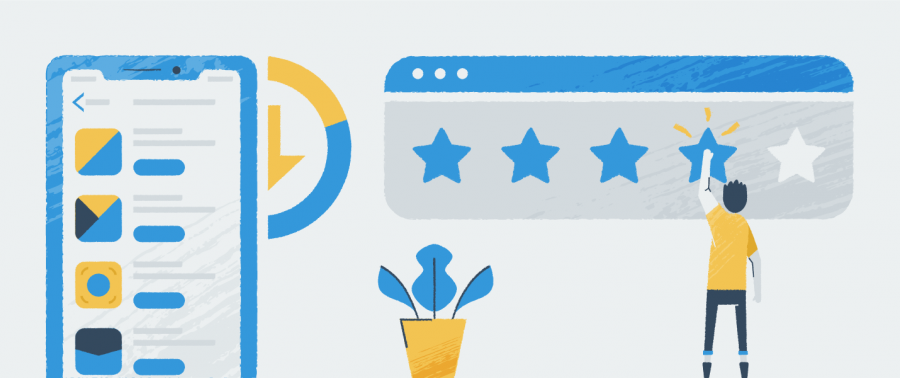

In [46]:
#inviting friends to help with the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#fetching assignment from the study-table
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Loading the data
app_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA/Play Store Data.csv')
reviews_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA/User Reviews.csv')

# First look at the data

In [6]:
#checking assignment difficulty / First look of the data
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
print(reviews_df['App'].nunique()) #checking for unique values in each df
len(app_df['App'].unique()) ##checking for unique values in each df 


1074


9660

# Treating the null values

In [49]:
app_df.info() #getting dataframe info and checking columns with null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
app_df.describe(include = 'all') #overview of all the columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(app_df.isnull().sum()) #number of null values each column
app_df.describe().columns #rating is the only float columns with many nan-values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Index(['Rating'], dtype='object')

We have multiple options to treat these null values.

 1) We can fill these null values.


 2)replace these null values.


 3) drop the rows with null values.

Here, I have chosen to drop the rows without a rating. Since rating is very a important factor in determining app engagement, it acts as a dependant variable if we choose to immplement a machine learning algorithm. 


In [51]:
app_df = app_df[app_df['Rating'].notna()] # selecting all the rows with non null rating values.
app_df = app_df.dropna(how='any') # droping rows with null values from all the columns
app_df.isnull().sum() # checking for null values again

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [52]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [53]:
reviews_df.info()  # checking null values in the reviews dataframe
reviews_df = reviews_df.dropna() # removing null values from the reviews dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [54]:
reviews_df.info() # Null values droped since we only need rows with sentiment data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


The Data type of all these columns is not correct or usable for EDA. 

Columns like reviews, size, installs, price should be Float data type. some of the other columns should be string data type. 

Lets proceed to do some data cleaning before the analysis.

# Data cleaning

In [55]:
# 1) Converting 'Reviews' to Float 
def float_converter(x):    #funtion to apply on the whole column
  return float(x)
app_df['Reviews'] = app_df['Reviews'].apply(float_converter) #updating the column

In [56]:
# 2) Converting 'Size' to Float data-type and in megabytes unit
print(app_df['Size'].unique())  #checking values in size column. The entries are in M,k, 'Varies with device'

def size_float(size):        # Defining a function to convert all sizes in Mega-Bytes           
  if 'M' in (size):          
    size = float(size[:-1]) 
  elif 'k' in (size):
    size = round((float(size[:-1]) / 1024),4)
  elif 'Varies with device' in size:
    size = float(0)
  return size
app_df['Size'] = app_df['Size'].apply(size_float) #updating the column

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M' '6.1M'
 '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.7M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

In [57]:
# 3) Converting installs to float
print(app_df['Installs'].unique()) 
def install_float(install): # Defining a function to remove '+' and '-'
  if ',' in install:
    install = install.replace(',', '')
  if '+' in install:
    install = install.replace('+', '')
  install = float(install)
  return (install)
app_df['Installs'] = app_df['Installs'].apply(install_float) #updating the column with numeric values

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']


In [58]:
# 4) Converting Price to float
app_df['Price'].unique() # The price units also contain $ sign which we have to remove and convert to float
def price_float(price): # Defining a function to remove '$'   
  if '$' in (price):
    price = price.replace('$','')
    price = float(price)
  else:
    price = float(price)
  return price
app_df['Price'] = app_df['Price'].apply(price_float) #updating the column with numeric values


In [59]:
app_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [60]:
app_df.describe()   # most of the data columns are converted to numeric data type

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,18.952803,1.790875e+07,0.961279
std,0.515263,3.145023e+06,23.018767,9.126637e+07,15.821640
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,2.400000,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,9.500000,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,27.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [20]:
app_df.sample(5) # checking some random rows from the data frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5699,AV Buddy Free,FAMILY,4.1,25.0,47.0,5000.0,Free,0.0,Everyone,Education,"March 8, 2017",1.2,4.1 and up
3870,Snapchat,SOCIAL,4.0,17000166.0,0.0,500000000.0,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
2584,"Text Me: Text Free, Call Free, Second Phone Nu...",SOCIAL,4.3,344921.0,0.0,10000000.0,Free,0.0,Everyone,Social,"June 7, 2018",Varies with device,Varies with device
3009,Yahoo Fantasy Sports - #1 Rated Fantasy App,SPORTS,4.2,277900.0,0.0,5000000.0,Free,0.0,Mature 17+,Sports,"August 2, 2018",Varies with device,Varies with device
2209,Fun Kid Racing - Motocross,FAMILY,4.1,59729.0,0.0,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"June 27, 2018",3.46,4.2 and up


Lets explore the category column and see what kind of effect it has on the rating. 


Lets have a look at the rating distribution before that.

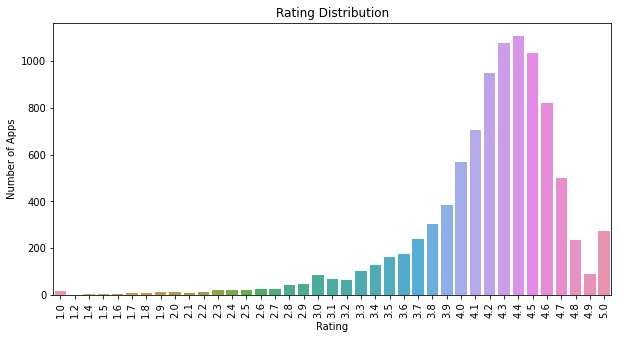

Average rating recieved by all the apps is 4.191837606837612.
The IQR is between 4.00 to 4.50
The top 10 percent sucessful apps(90 percentile) are rated 4.7 or above


In [21]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=app_df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()
print('Average rating recieved by all the apps is {}.'.format(app_df['Rating'].mean()))
print('The IQR is between 4.00 to 4.50')
print('The top 10 percent sucessful apps(90 percentile) are rated {} or above'.format(app_df.Rating.quantile(0.9)))

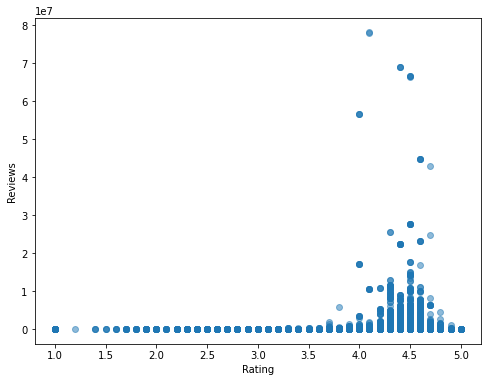

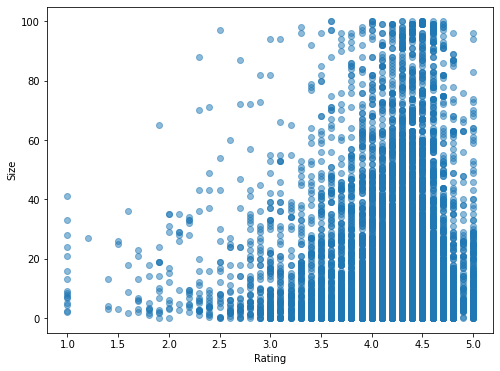

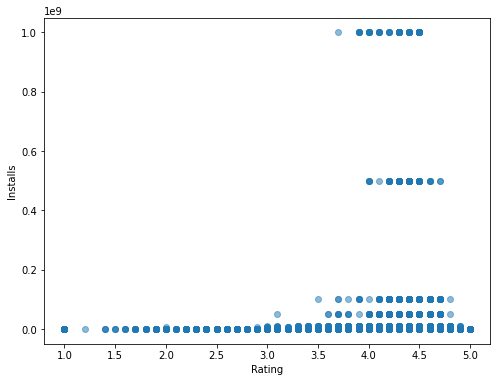

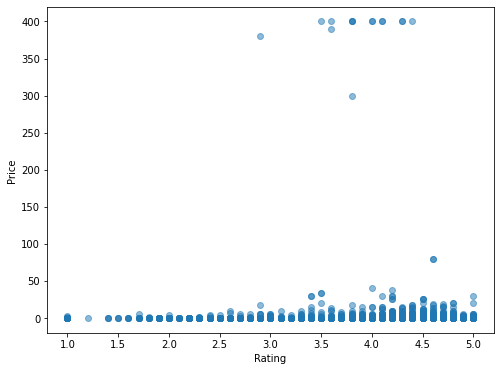

In [31]:
numeric_columns = list(app_df.describe().columns)
numeric_columns.remove('Rating')
for i in numeric_columns:
  plt.figure(figsize=(8,6))
  plt.scatter(app_df['Rating'],app_df[i],alpha=0.5, )
  plt.xlabel('Rating')
  plt.ylabel(i)
  plt.show()


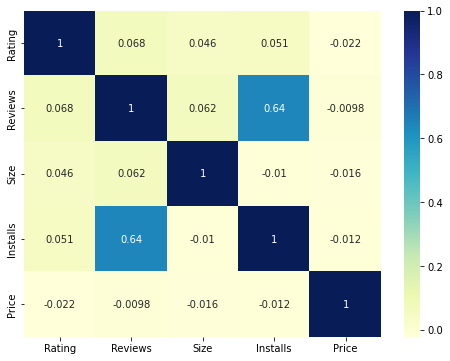

In [23]:
 ## Correlation
plt.figure(figsize=(8,6))
correlation = app_df[list(app_df.describe().columns)].corr()
sns.heatmap(correlation, annot=True, cmap='YlGnBu')

**Category column**

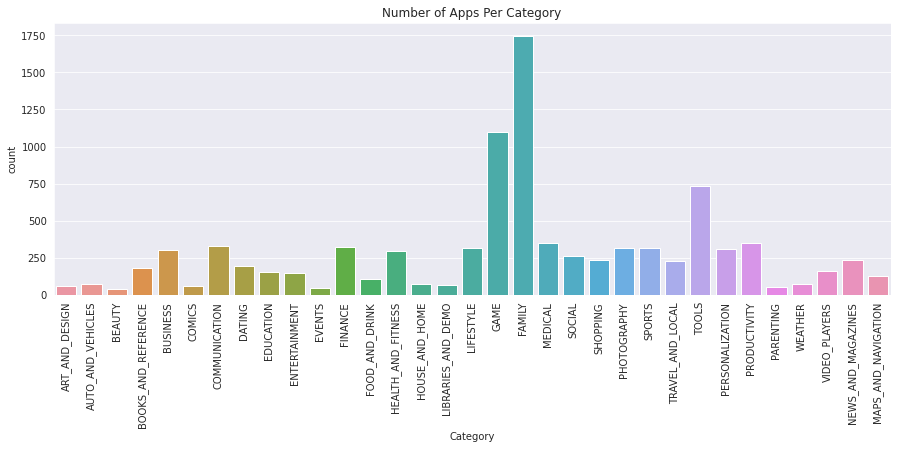

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=app_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.show()

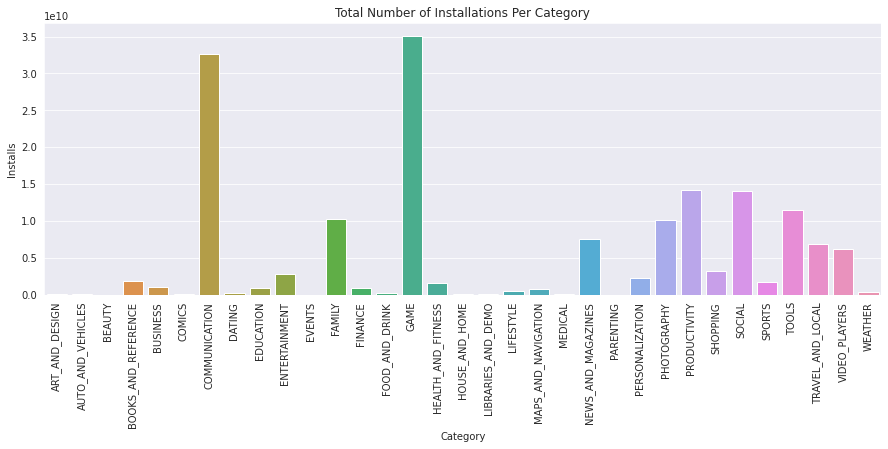

In [49]:
k = app_df.groupby(['Category'])['Installs'].sum().reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Installs', data=k)
plt.title('Total Number of Installations Per Category')
plt.xticks(rotation=90)
plt.show()

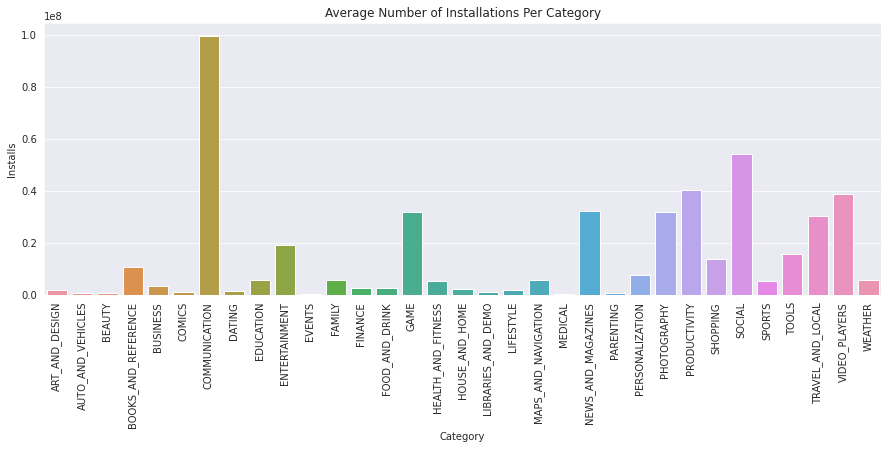

In [50]:
k1 = app_df.groupby(['Category'])['Installs'].mean().reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Installs', data=k1)
plt.title('Average Number of Installations Per Category')
plt.xticks(rotation=90)
plt.show()

In [115]:
Category_Rating = app_df.groupby(['Category'])['Rating'].mean().reset_index()
print('The maximun avg rating is recieved by {}'.format(Category_Rating.max()['Category']),'category with a rating of {}'.format(Category_Rating.max()['Rating']))
print('The minimum avg rating is recieved by {}'.format(Category_Rating.min()['Category']), 'category with a rating of {}'.format(Category_Rating.min()['Rating']) )

The maximun avg rating is recieved by WEATHER category with a rating of 4.435555555555555
The minimum avg rating is recieved by ART_AND_DESIGN category with a rating of 3.9707692307692306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

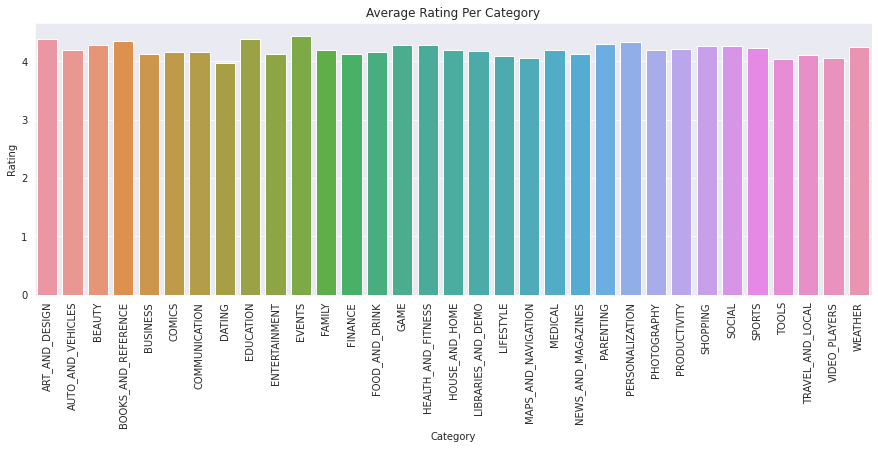

In [119]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Rating', data=Category_Rating)
plt.title('Average Rating Per Category')
plt.xticks(rotation=90)

**Type(free/paid) column**

   Type    Rating
0  Free  4.186288
1  Paid  4.266822


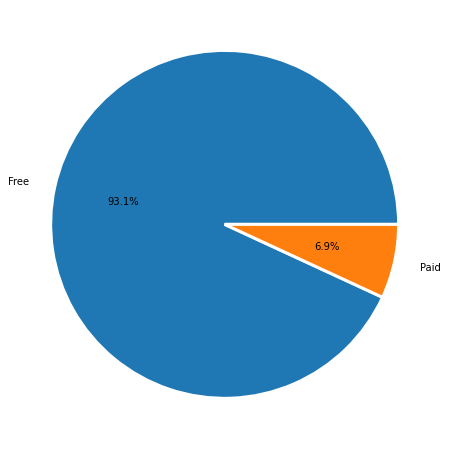

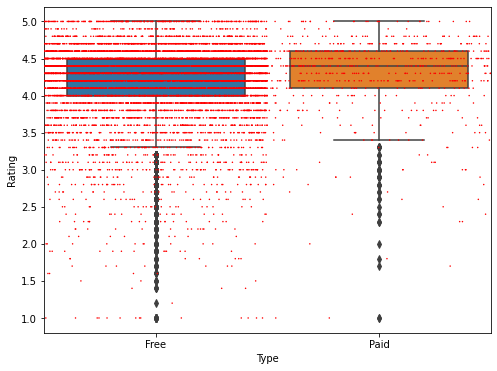

In [34]:
#Type of Apps
#plotting a pie chard to see the spilt of free/paid apps
names = ['Free', 'Paid']
values = app_df['Type'].value_counts() 
plt.figure(figsize=(8,8))
plt.pie(values, labels=names, autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });  #plotting a pie chart
print(app_df.groupby(['Type'])['Rating'].mean().reset_index())
values

# box plot with jitter to see the spread of the rating values in both the sections(free/paid)
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Type', y='Rating', data=app_df)    #box plot
ax = sns.stripplot(x='Type', y='Rating', data=app_df, color="red", jitter=0.5, size=1.5) #add stip plot 
plt.show()

**Content Rating column**

    Content Rating    Rating
0  Adults only 18+  4.300000
1         Everyone  4.186472
2     Everyone 10+  4.257179
3       Mature 17+  4.123427
4             Teen  4.233487
5          Unrated  4.100000


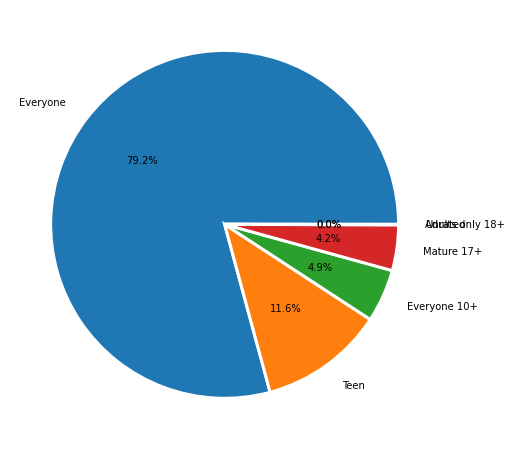

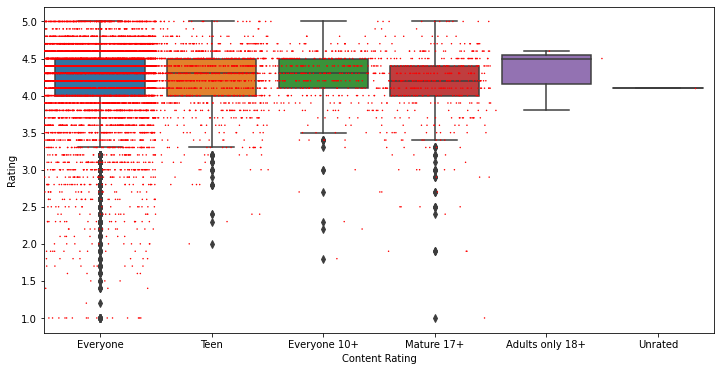

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


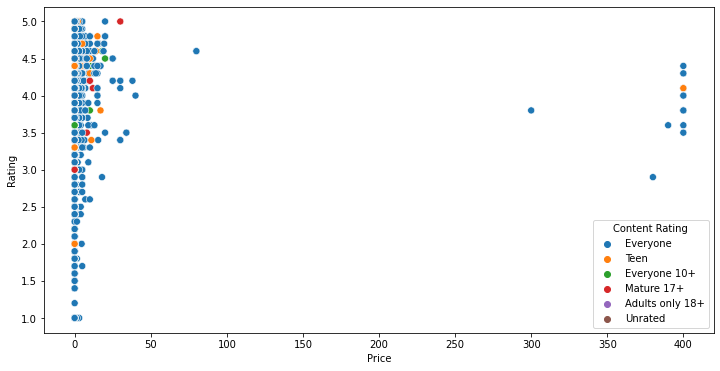

In [29]:
app_df['Content Rating'].unique()
#plotting a pie chart to see the spilt of different content ratings
names = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated']
values = app_df['Content Rating'].value_counts() 
plt.figure(figsize=(8,8))
plt.pie(values, labels=names,autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });  #plotting a pie chart
print(app_df.groupby(['Content Rating'])['Rating'].mean().reset_index())

# box plot with jitter to see the spread of the rating values in different content rating sections(free/paid)
plt.figure(figsize=(12,6))
ax1 = sns.boxplot(x='Content Rating', y='Rating', data=app_df)    #box plot
ax1 = sns.stripplot(x='Content Rating', y='Rating', data=app_df, color="red", jitter=0.5, size=1.5) #add stip plot 
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(app_df['Price'],
               app_df['Rating'],
               hue=app_df['Content Rating'],
               s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


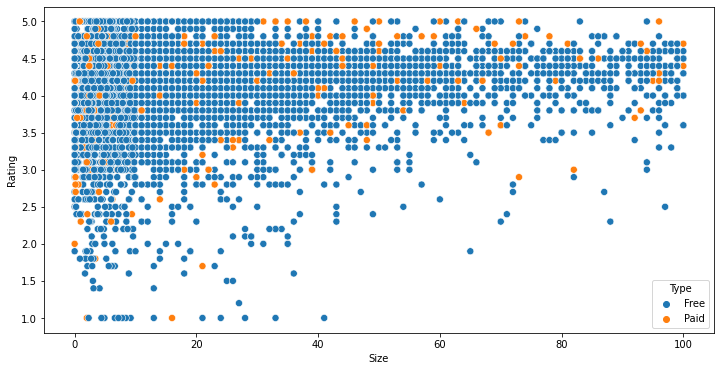

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(app_df['Size'],
               app_df['Rating'],
               hue=app_df['Type'],
               s=50)

**Plotting some metrics for the top rated apps**


I have considered the top 10%(90 percentile of rating) of the applications to be extremely successful and well designed. But an app can have a very high rating with very few reviews. This does not qualify an app to be successful. Since the number of users is small and their reviews could be biased(very sample size). To solve this problem, I have applied a minimum threshold of 1000 reviews for my screening of successful applications. This is to make sure that successful applications have a good amount of users, and the sample size of the users is not very small. 

In [77]:
ninety_percentile = app_df.Rating.quantile(0.9)
highratedapps = app_df[app_df['Rating'] >= ninety_percentile].reset_index() # Screening the top rated apps and creating a data frame
review_threshold = 500.00
scr_highratedapps = highratedapps[highratedapps['Reviews'] > review_threshold] # Applying reviews threshold to the apps
scr_highratedapps.sample(5) #taking 5 values at random from the dataframe

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
958,9486,TeamWard – live help for LoL,FAMILY,4.8,3136.0,2.7,100000.0,Free,0.0,Everyone,Entertainment,"June 27, 2018",2.19.6,4.0.3 and up
423,4891,30 Day AB Challenge - Lumowell,HEALTH_AND_FITNESS,4.8,793.0,40.0,10000.0,Free,0.0,Everyone,Health & Fitness,"September 15, 2016",1.0.3,4.0.3 and up
857,8462,"Quik – Free Video Editor for photos, clips, music",VIDEO_PLAYERS,4.7,696665.0,91.0,10000000.0,Free,0.0,Everyone,Video Players & Editors,"July 5, 2018",4.7.4.3869-7b2372c3e,5.0 and up
320,3604,The first year of a baby's life,PARENTING,4.8,7505.0,9.1,100000.0,Free,0.0,Everyone,Parenting,"January 7, 2017",1.1.27.477-free,2.3 and up
620,6587,Blood Pressure Log - MyDiary,MEDICAL,4.7,8347.0,2.6,500000.0,Free,0.0,Everyone,Medical,"April 13, 2018",1.4.6,4.0 and up


Now, we will be comparing the graphs of all the apps in the dataframe vs the successful apps(according to user ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top Rated Apps')

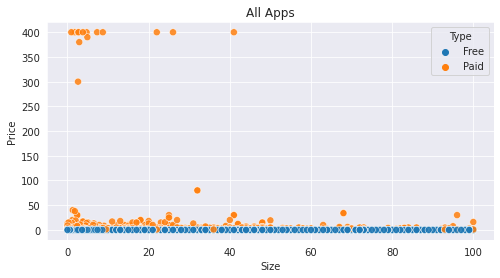

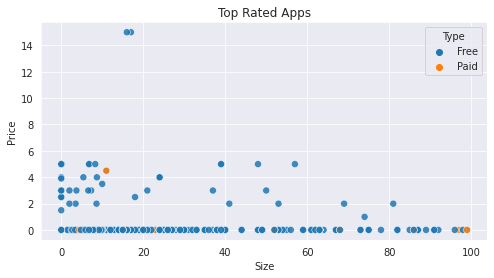

In [85]:
plt.figure(figsize=(8, 4))
sns.scatterplot(app_df['Size'],app_df['Price'],alpha=0.85,hue=app_df['Type'],s=50)
plt.title('All Apps')

plt.figure(figsize=(8, 4))
sns.scatterplot(scr_highratedapps['Size'],scr_highratedapps['Price'],alpha=0.85,hue=app_df['Type'],s=50)
plt.title('Top Rated Apps')

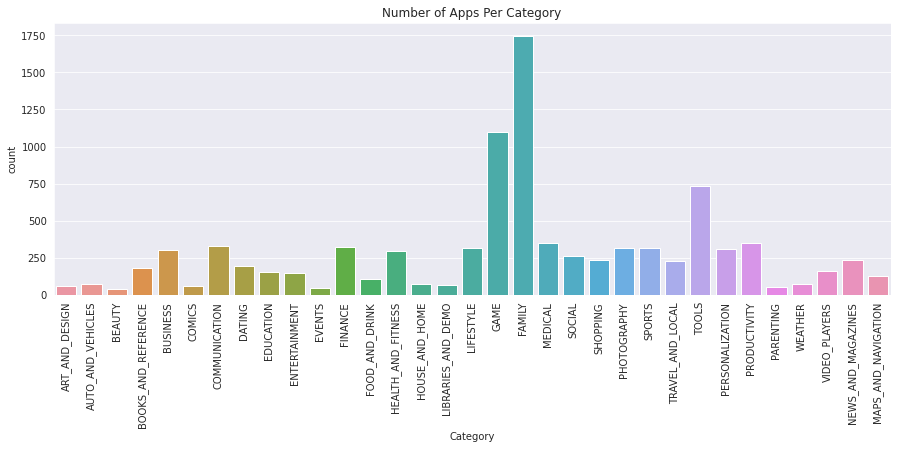

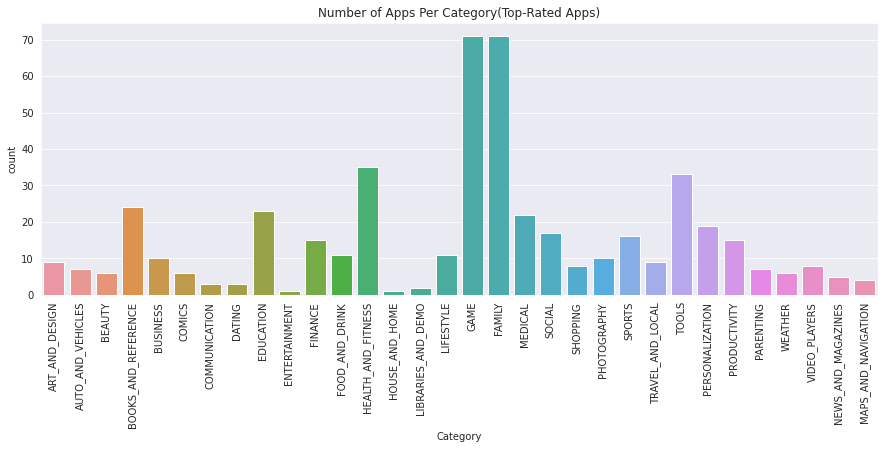

In [88]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=app_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=screened_highratedapps)
plt.title('Number of Apps Per Category(Top-Rated Apps)')
plt.xticks(rotation=90)
plt.show()